In [57]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
actual_list = [0]*100 + [1]*100
random.shuffle(actual_list)
print(actual_list)
print(len(actual_list))

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
200


In [59]:
pred_list = []
for i in range(0,200):
    pred_list.append(np.round(random.uniform(0,1),2))
    
print(pred_list)
print(len(pred_list))

[1.0, 0.98, 0.94, 0.77, 0.92, 0.53, 0.16, 0.49, 0.29, 0.11, 0.19, 0.9, 0.74, 0.94, 0.83, 0.86, 0.94, 0.84, 0.34, 0.15, 0.24, 0.94, 0.24, 0.1, 0.69, 0.17, 0.27, 0.68, 0.36, 0.54, 0.15, 0.96, 0.38, 0.44, 0.5, 0.79, 0.96, 0.08, 0.85, 0.03, 0.53, 0.02, 0.67, 0.51, 0.76, 0.04, 0.81, 0.06, 0.19, 0.81, 0.11, 0.02, 0.06, 0.73, 0.12, 0.73, 0.83, 0.2, 0.58, 0.98, 1.0, 0.37, 0.27, 0.42, 0.8, 0.56, 0.08, 0.84, 0.62, 0.81, 0.76, 0.17, 0.99, 0.13, 0.15, 0.41, 0.32, 0.0, 0.25, 0.43, 0.93, 0.28, 0.26, 0.89, 0.9, 0.95, 0.69, 0.46, 0.94, 0.77, 0.9, 0.52, 0.87, 0.79, 0.22, 0.0, 0.25, 0.49, 0.33, 0.17, 0.18, 0.32, 0.98, 0.98, 0.98, 0.02, 0.22, 0.51, 0.45, 0.83, 0.3, 0.7, 0.24, 0.22, 0.97, 0.83, 0.05, 0.69, 0.34, 0.23, 0.4, 0.49, 0.65, 0.91, 0.74, 0.55, 0.57, 0.21, 0.53, 0.22, 0.29, 0.67, 0.98, 0.9, 0.09, 0.77, 0.39, 0.07, 0.43, 0.11, 0.97, 0.53, 0.4, 0.08, 0.79, 0.4, 0.59, 0.01, 0.55, 0.6, 0.2, 0.25, 0.74, 0.37, 0.17, 0.21, 0.01, 0.46, 0.91, 0.89, 0.22, 0.34, 0.57, 0.55, 0.31, 0.18, 0.93, 0.15, 0.02, 0.9,

In [60]:
df1 = pd.DataFrame(actual_list)
df2 = pd.DataFrame(pred_list)
df = pd.concat([df1, df2], axis = 1)
df.columns = ['y_actual', 'y_pred']
df.head()

,y_actual,y_pred
0,1,1.00
1,0,0.98
2,0,0.94
3,1,0.77
4,0,0.92


### Coding for ROC_AUC curve

In [61]:
thresholds = list(np.array(list(range(0,105,5)))/100)
print(thresholds)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [62]:
roc_point = []

for threshold in thresholds:
    tp = 0; fp = 0; fn = 0; tn = 0
    
    for index, instance in df.iterrows():
        actual = instance['y_actual']
        prediction = instance['y_pred']
        
        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0
            
        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif prediction_class == 1 and actual == 0:
            fp = fp + 1
        elif prediction_class == 0 and actual == 0:
            tn = tn + 1
        elif prediction_class == 0 and actual == 1:
            fn = fn + 1
            
    tpr = tp / (tp + fn)
    fpr = fp/ (fp + tn)
    
    roc_point.append([tpr, fpr])
        

In [63]:
roc_point

[[1.0, 1.0],
 [0.94, 0.94],
 [0.89, 0.9],
 [0.85, 0.86],
 [0.8, 0.78],
 [0.7, 0.75],
 [0.66, 0.69],
 [0.64, 0.6],
 [0.6, 0.58],
 [0.54, 0.56],
 [0.5, 0.53],
 [0.47, 0.44],
 [0.43, 0.4],
 [0.42, 0.39],
 [0.37, 0.34],
 [0.35, 0.28],
 [0.3, 0.23],
 [0.25, 0.16],
 [0.2, 0.14],
 [0.13, 0.05],
 [0.02, 0.0]]

In [64]:
df_final = pd.DataFrame(roc_point, columns = ['tpr', 'fpr'])
df_final['thresholds'] = thresholds
df_final.head()

,tpr,fpr,thresholds
0,1.00,1.00,0.00
1,0.94,0.94,0.05
2,0.89,0.90,0.10
3,0.85,0.86,0.15
4,0.80,0.78,0.20


Text(0, 0.5, 'true_positive_rate')

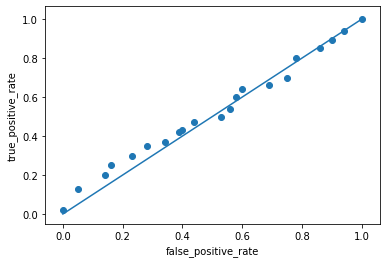

In [65]:
plt.scatter(df_final.fpr, df_final.tpr)
plt.plot([0,1])
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')

In [66]:
##Auc score
round(abs(np.trapz(df_final.fpr, df_final.tpr)),2)

0.48